# Timing results for 2D Pressure Poisson Solver

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Full Matrix with Hypre (1)
4 level Mesh, divide 2

(Note: on all numbers of cores I recieved this message: Linear solve did not converge due to DIVERGED_ITS iterations 5000)

In [2]:
Petsc_Hypre_Full_Cores = np.array([1,2,4,8,16,32,64])
Petsc_Hypre_Full_Iterations = np.array([5000,5000,5000,5000,5000,5000,5000])
Petsc_Hypre_Full_Residual = np.array([5.1440916412698e-12,7.4457000462186e-12,5.1190832230103e-12,6.3506797888769e-12,
                                      5.1339906865290e-12,7.8046459024054e-12,6.9679990642007e-12])
Petsc_Hypre_Full_Error = np.array([9.2304660458272e-04,9.2304660460753e-04,9.2304660458417e-04,9.2304660458907e-04,
                                   9.2304660458272e-04,9.2304660459265e-04,9.2304660458041e-04])
Petsc_Hypre_Full_Domain = np.array([0.5839118612,0.3169376837,0.1638771106,0.0902800064,0.0513676287,0.0459715367,
                                   0.0303975181])
Petsc_Hypre_Full_Matrix = np.array([0.8104584917,0.5273871579,0.2756661383,0.147858201,0.0851094482,0.046911915,
                                   0.0311453948])
Petsc_Hypre_Full_Petsc = np.array([2.6410983062,28.3480519357,14.1447757994,5.2138989039,1.7539493038,0.714940094,
                                  0.5130295848])
Petsc_Hypre_Full_LSS = np.array([3.4515674341,28.8754516324,14.4204580111,5.36177828,1.8390873784,0.7619222103,
                                0.5442787802])
Petsc_Hypre_Full_LinS = np.array([3593.655821962,2223.762275693,1889.523625442,1784.873625948,1674.99098359,
                                  1205.707730647,1163.371327034])
Petsc_Hypre_Full_CS = np.array([3593.655827128,2223.762286893,1889.524029697,1784.874220864,1674.992754103,
                               1205.710852144,1163.373198184])
Petsc_Hypre_Full_DegF = np.array([2129920,2129920,2129920,2129920,2129920,2129920,2129920])
Petsc_Hypre_Full_Eff = Petsc_Hypre_Full_CS[0]/(Petsc_Hypre_Full_CS*Petsc_Hypre_Full_Cores)

d = {"Cores": Petsc_Hypre_Full_Cores,"Iterations": Petsc_Hypre_Full_Iterations,"Residual": Petsc_Hypre_Full_Residual,
    "Error": Petsc_Hypre_Full_Error,"Domain Initialization": Petsc_Hypre_Full_Domain,"Matrix Formation": Petsc_Hypre_Full_Matrix,
    "Hypre Setup": Petsc_Hypre_Full_Petsc,"Linear System Setup": Petsc_Hypre_Full_LSS,"Linear Solve": Petsc_Hypre_Full_LinS,
    "Complete Solve": Petsc_Hypre_Full_CS,"Efficiency": Petsc_Hypre_Full_Eff,"Degrees of Freedom": Petsc_Hypre_Full_DegF}
df1 =  pd.DataFrame(data = d)
df1 = df1[["Cores","Iterations","Residual","Error","Domain Initialization","Matrix Formation","Hypre Setup",
         "Linear System Setup","Linear Solve","Complete Solve","Efficiency","Degrees of Freedom"]]
df1

,Cores,Iterations,Residual,Error,Domain Initialization,Matrix Formation,Hypre Setup,Linear System Setup,Linear Solve,Complete Solve,Efficiency,Degrees of Freedom
0,1,5000,5.144092e-12,0.000923,0.583912,0.810458,2.641098,3.451567,3593.655822,3593.655827,1.000000,2129920
1,2,5000,7.445700e-12,0.000923,0.316938,0.527387,28.348052,28.875452,2223.762276,2223.762287,0.808013,2129920
2,4,5000,5.119083e-12,0.000923,0.163877,0.275666,14.144776,14.420458,1889.523625,1889.524030,0.475471,2129920
3,8,5000,6.350680e-12,0.000923,0.090280,0.147858,5.213899,5.361778,1784.873626,1784.874221,0.251674,2129920
4,16,5000,5.133991e-12,0.000923,0.051368,0.085109,1.753949,1.839087,1674.990984,1674.992754,0.134092,2129920
5,32,5000,7.804646e-12,0.000923,0.045972,0.046912,0.714940,0.761922,1205.707731,1205.710852,0.093142,2129920
6,64,5000,6.967999e-12,0.000923,0.030398,0.031145,0.513030,0.544279,1163.371327,1163.373198,0.048266,2129920


<function matplotlib.pyplot.show>

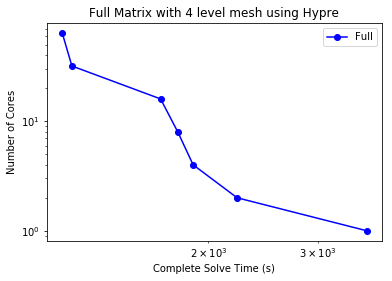

In [3]:
plt.plot(Petsc_Hypre_Full_CS,Petsc_Hypre_Full_Cores,"bo-",label="Full")
plt.yscale("log")
plt.xscale("log")
plt.ylabel("Number of Cores")
plt.xlabel("Complete Solve Time (s)")
plt.title("Full Matrix with 4 level mesh using Hypre")
plt.legend()
plt.show

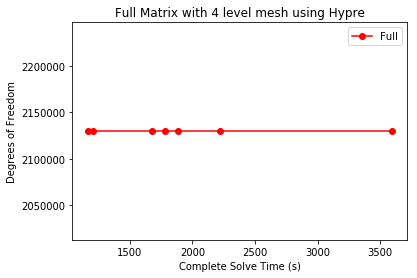

In [4]:
plt.plot(Petsc_Hypre_Full_CS,Petsc_Hypre_Full_DegF,"ro-",label="Full")
plt.ylabel("Degrees of Freedom")
plt.xlabel("Complete Solve Time (s)")
plt.title("Full Matrix with 4 level mesh using Hypre")
plt.legend()

# Full Matrix with AMGX (2)
4 level Mesh, divide 2

In [5]:
Petsc_AMGX_Full_Cores = np.array([1,2,4,8])
Petsc_AMGX_Full_Iterations = np.array([39,37,38,65])
Petsc_AMGX_Full_Residual = np.array([5.8251507857323e-11,5.9432372630946e-12,5.4902317909355e-12,6.7366153106333e-12])
Petsc_AMGX_Full_Error = np.array([9.2304660445096e-04,9.2304660471372e-04,9.2304660453712e-04,9.2304660476448e-04])
Petsc_AMGX_Full_Domain = np.array([0.5903979252,0.3186255926,0.1628198647,0.0815449427])
Petsc_AMGX_Full_Matrix = np.array([0.8642156914,0.5233281249,0.2647758999,0.1360955876])
Petsc_AMGX_Full_AMGX = np.array([1.1430887716,2.2335680514,2.0293313354,1.6677904826])
Petsc_AMGX_Full_LSS = np.array([2.0073132098,2.7569079597,2.2941298202,1.803915502])
Petsc_AMGX_Full_LinS = np.array([1.462938244,1.1574490177,0.8998026873,1.2936377062])
Petsc_AMGX_Full_CS = np.array([1.4629419528,1.1574543659,0.8998145702,1.2936539742])
Petsc_AMGX_Full_DegF = np.array([2129920,2129920,2129920,2129920])
Petsc_AMGX_Full_Eff = Petsc_AMGX_Full_CS[0]/(Petsc_AMGX_Full_CS*Petsc_AMGX_Full_Cores)

d = {"Cores": Petsc_AMGX_Full_Cores,"Iterations": Petsc_AMGX_Full_Iterations,"Residual": Petsc_AMGX_Full_Residual,
    "Error": Petsc_AMGX_Full_Error,"Domain Initialization": Petsc_AMGX_Full_Domain,"Matrix Formation": Petsc_AMGX_Full_Matrix,
    "AMGX Setup": Petsc_AMGX_Full_AMGX,"Linear System Setup": Petsc_AMGX_Full_LSS,"Linear Solve": Petsc_AMGX_Full_LinS,
    "Complete Solve": Petsc_AMGX_Full_CS,"Efficiency": Petsc_AMGX_Full_Eff,"Degrees of Freedom": Petsc_AMGX_Full_DegF}
df2 =  pd.DataFrame(data = d)
df2 = df2[["Cores","Iterations","Residual","Error","Domain Initialization","Matrix Formation","AMGX Setup",
         "Linear System Setup","Linear Solve","Complete Solve","Efficiency","Degrees of Freedom"]]
df2

,Cores,Iterations,Residual,Error,Domain Initialization,Matrix Formation,AMGX Setup,Linear System Setup,Linear Solve,Complete Solve,Efficiency,Degrees of Freedom
0,1,39,5.825151e-11,0.000923,0.590398,0.864216,1.143089,2.007313,1.462938,1.462942,1.000000,2129920
1,2,37,5.943237e-12,0.000923,0.318626,0.523328,2.233568,2.756908,1.157449,1.157454,0.631965,2129920
2,4,38,5.490232e-12,0.000923,0.162820,0.264776,2.029331,2.294130,0.899803,0.899815,0.406457,2129920
3,8,65,6.736615e-12,0.000923,0.081545,0.136096,1.667790,1.803916,1.293638,1.293654,0.141358,2129920


<function matplotlib.pyplot.show>

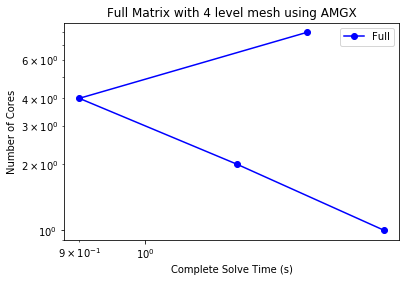

In [6]:
plt.plot(Petsc_AMGX_Full_CS,Petsc_AMGX_Full_Cores,"bo-",label="Full")
plt.yscale("log")
plt.xscale("log")
plt.ylabel("Number of Cores")
plt.xlabel("Complete Solve Time (s)")
plt.title("Full Matrix with 4 level mesh using AMGX")
plt.legend()
plt.show

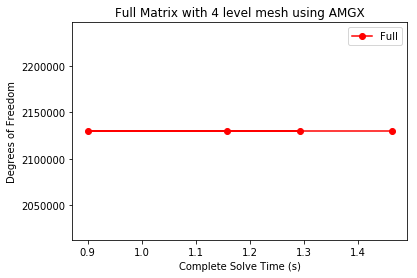

In [7]:
plt.plot(Petsc_AMGX_Full_CS,Petsc_AMGX_Full_DegF,"ro-",label="Full")
plt.ylabel("Degrees of Freedom")
plt.xlabel("Complete Solve Time (s)")
plt.title("Full Matrix with 4 level mesh using AMGX")
plt.legend()

# Schur Matrix with Hypre (3)
4 level Mesh, divide 2

In [8]:
Petsc_Hypre_Schur_Cores = np.array([1,2,4,8,16,32,64])
Petsc_Hypre_Schur_Iterations = np.array([15,16,15,15,15,15,15])
Petsc_Hypre_Schur_Residual = np.array([1.4921383876826e-11,1.7220707735628e-11,1.4581840990874e-11,1.5825807654468e-11,
                                      1.6702296611205e-11,1.3552860002989e-11,1.3209191840070e-11])
Petsc_Hypre_Schur_Error = np.array([9.2304660338315e-04,9.2304660440241e-04,9.2304660380692e-04,9.2304660390208e-04,
                                   9.2304660497885e-04,9.2304660452603e-04,9.2304660427317e-04])
Petsc_Hypre_Schur_Domain = np.array([0.5760825519,0.3183954835,0.1626387854,0.0870258676,0.0464655059,0.0241027643,
                                    0.0130447396])
Petsc_Hypre_Schur_Matrix = np.array([1.2923972976,0.6724024935,0.3957461371,0.2491670264,0.1601606103,0.0911872781,
                                     0.0480356934])
Petsc_Hypre_Schur_Petsc = np.array([1.2439340614,0.743642809,0.4749248756,0.3160935496,0.2168506626,0.1442224058,
                                   0.1274887984])
Petsc_Hypre_Schur_LSS = np.array([2.5363416905,1.4160582366,0.8706880539,0.5652815754,0.3770350551,0.2354591543,
                                 0.1755852286])
Petsc_Hypre_Schur_LinS = np.array([6.3049499966,3.9294155822,3.4292208332,3.8394493443,0.9232984641,0.4772214199,
                                  0.3042294933])
Petsc_Hypre_Schur_PatS = np.array([0.0654250609,0.0362876569,0.0593896497,0.0491331545,0.0050379279,0.002635037,
                                  0.0015443831])
Petsc_Hypre_Schur_CS = np.array([6.3703831963,3.9657228067,3.4886692446,3.8905896156,0.9283604692,0.4799156356,
                                0.3058381772])
Petsc_Hypre_Schur_DegF = np.array([2129920,2129920,2129920,2129920,2129920,2129920,2129920])
Petsc_Hypre_Schur_Eff = Petsc_Hypre_Schur_CS[0]/(Petsc_Hypre_Schur_CS*Petsc_Hypre_Schur_Cores)

d = {"Cores": Petsc_Hypre_Schur_Cores,"Iterations": Petsc_Hypre_Schur_Iterations,"Residual": Petsc_Hypre_Schur_Residual,
    "Error": Petsc_Hypre_Schur_Error,"Domain Initialization": Petsc_Hypre_Schur_Domain,"Matrix Formation": Petsc_Hypre_Schur_Matrix,
    "Hypre Setup": Petsc_Hypre_Schur_Petsc,"Linear System Setup": Petsc_Hypre_Schur_LSS,"Linear Solve": Petsc_Hypre_Schur_LinS,
    "Patch Solve": Petsc_Hypre_Schur_PatS,"Complete Solve": Petsc_Hypre_Schur_CS,"Efficiency": Petsc_Hypre_Schur_Eff,
     "Degrees of Freedom": Petsc_Hypre_Schur_DegF}
df3 =  pd.DataFrame(data = d)
df3 = df3[["Cores","Iterations","Residual","Error","Domain Initialization","Matrix Formation","Hypre Setup",
         "Linear System Setup","Linear Solve","Patch Solve","Complete Solve","Efficiency","Degrees of Freedom"]]
df3

,Cores,Iterations,Residual,Error,Domain Initialization,Matrix Formation,Hypre Setup,Linear System Setup,Linear Solve,Patch Solve,Complete Solve,Efficiency,Degrees of Freedom
0,1,15,1.492138e-11,0.000923,0.576083,1.292397,1.243934,2.536342,6.304950,0.065425,6.370383,1.000000,2129920
1,2,16,1.722071e-11,0.000923,0.318395,0.672402,0.743643,1.416058,3.929416,0.036288,3.965723,0.803181,2129920
2,4,15,1.458184e-11,0.000923,0.162639,0.395746,0.474925,0.870688,3.429221,0.059390,3.488669,0.456505,2129920
3,8,15,1.582581e-11,0.000923,0.087026,0.249167,0.316094,0.565282,3.839449,0.049133,3.890590,0.204673,2129920
4,16,15,1.670230e-11,0.000923,0.046466,0.160161,0.216851,0.377035,0.923298,0.005038,0.928360,0.428873,2129920
5,32,15,1.355286e-11,0.000923,0.024103,0.091187,0.144222,0.235459,0.477221,0.002635,0.479916,0.414811,2129920
6,64,15,1.320919e-11,0.000923,0.013045,0.048036,0.127489,0.175585,0.304229,0.001544,0.305838,0.325457,2129920


<function matplotlib.pyplot.show>

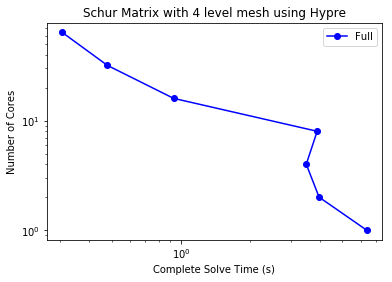

In [9]:
plt.plot(Petsc_Hypre_Schur_CS,Petsc_Hypre_Schur_Cores,"bo-",label="Full")
plt.yscale("log")
plt.xscale("log")
plt.ylabel("Number of Cores")
plt.xlabel("Complete Solve Time (s)")
plt.title("Schur Matrix with 4 level mesh using Hypre")
plt.legend()
plt.show

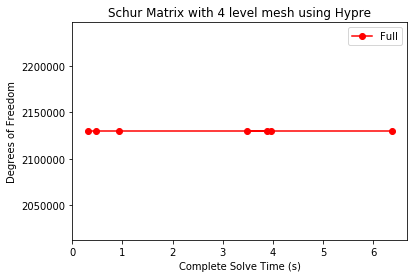

In [10]:
plt.plot(Petsc_Hypre_Schur_CS,Petsc_Hypre_Schur_DegF,"ro-",label="Full")
plt.ylabel("Degrees of Freedom")
plt.xlabel("Complete Solve Time (s)")
plt.title("Schur Matrix with 4 level mesh using Hypre")
plt.legend()

# Schur Matrix with AMGX (4)
4 level Mesh, divide 2

In [11]:
Petsc_AMGX_Schur_Cores = np.array([1,2,4,8])
Petsc_AMGX_Schur_Iterations = np.array([17,17,22,23])
Petsc_AMGX_Schur_Residual = np.array([1.3695817646415e-11,1.3548303935857e-11,1.8316663826715e-11,1.7930090921489e-11])
Petsc_AMGX_Schur_Error = np.array([9.2304660344892e-04,9.2304660472995e-04,9.2304659469577e-04,9.2304660479051e-04])
Petsc_AMGX_Schur_Domain = np.array([0.5855890301,0.3206256908,0.1588446304,0.0792485065])
Petsc_AMGX_Schur_Matrix = np.array([1.4475454043,0.7005159386,0.3667015114,0.2538813382])
Petsc_AMGX_Schur_AMGX = np.array([1.5284000524,0.8723155789,0.623428325,0.8332132946])
Petsc_AMGX_Schur_LSS = np.array([2.975953922,1.5728427425,0.9901511835,1.0871343354])
Petsc_AMGX_Schur_LinS = np.array([0.3923422311,0.3040044664,0.2743465336,0.2876472744])
Petsc_AMGX_Schur_PS = np.array([0.0601743763,0.033307604,0.0168305067,0.0098936041])
Petsc_AMGX_Schur_CS = np.array([0.4525222653,0.3373205181,0.2911922364,0.2975672569])
Petsc_AMGX_Schur_DegF = np.array([2129920,2129920,2129920,2129920])
Petsc_AMGX_Schur_Eff = np.array(np.ones(len(Petsc_AMGX_Schur_Cores))*Petsc_AMGX_Schur_CS[0]/(Petsc_AMGX_Schur_CS*Petsc_AMGX_Schur_Cores))

d = {"Cores": Petsc_AMGX_Schur_Cores,"Iterations": Petsc_AMGX_Schur_Iterations,"Residual": Petsc_AMGX_Schur_Residual,
    "Error": Petsc_AMGX_Schur_Error,"Domain Initialization": Petsc_AMGX_Schur_Domain,"Matrix Formation": Petsc_AMGX_Schur_Matrix,
    "AMGX Setup": Petsc_AMGX_Schur_AMGX,"Linear System Setup": Petsc_AMGX_Schur_LSS,"Linear Solve": Petsc_AMGX_Schur_LinS,
    "Patch Solve": Petsc_AMGX_Schur_PS,"Complete Solve": Petsc_AMGX_Schur_CS,"Efficiency": Petsc_AMGX_Schur_Eff,
    "Degrees of Freedom": Petsc_AMGX_Full_DegF}
df4 =  pd.DataFrame(data = d)
df4 = df4[["Cores","Iterations","Residual","Error","Domain Initialization","Matrix Formation","AMGX Setup",
         "Linear System Setup","Linear Solve","Patch Solve","Complete Solve","Efficiency","Degrees of Freedom"]]
df4

,Cores,Iterations,Residual,Error,Domain Initialization,Matrix Formation,AMGX Setup,Linear System Setup,Linear Solve,Patch Solve,Complete Solve,Efficiency,Degrees of Freedom
0,1,17,1.369582e-11,0.000923,0.585589,1.447545,1.528400,2.975954,0.392342,0.060174,0.452522,1.000000,2129920
1,2,17,1.354830e-11,0.000923,0.320626,0.700516,0.872316,1.572843,0.304004,0.033308,0.337321,0.670760,2129920
2,4,22,1.831666e-11,0.000923,0.158845,0.366702,0.623428,0.990151,0.274347,0.016831,0.291192,0.388508,2129920
3,8,23,1.793009e-11,0.000923,0.079249,0.253881,0.833213,1.087134,0.287647,0.009894,0.297567,0.190092,2129920


<function matplotlib.pyplot.show>

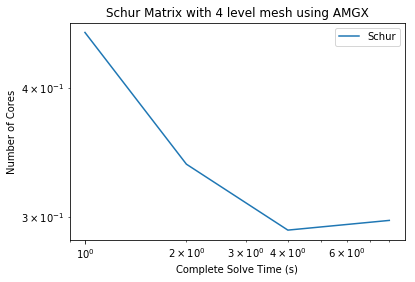

In [12]:
plt.plot(Petsc_AMGX_Schur_Cores,Petsc_AMGX_Schur_CS,label="Schur")
plt.yscale("log")
plt.xscale("log")
plt.ylabel("Number of Cores")
plt.xlabel("Complete Solve Time (s)")
plt.title("Schur Matrix with 4 level mesh using AMGX")
plt.legend()
plt.show

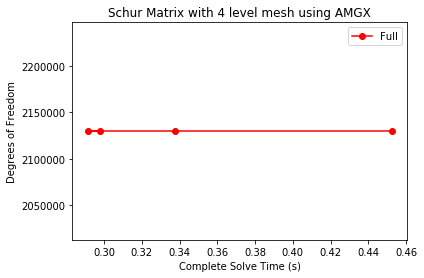

In [13]:
plt.plot(Petsc_AMGX_Schur_CS,Petsc_AMGX_Schur_DegF,"ro-",label="Full")
plt.ylabel("Degrees of Freedom")
plt.xlabel("Complete Solve Time (s)")
plt.title("Schur Matrix with 4 level mesh using AMGX")
plt.legend()

<function matplotlib.pyplot.show>

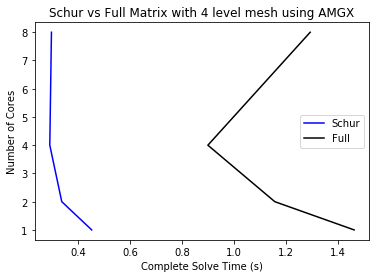

In [14]:
plt.plot(Petsc_AMGX_Schur_CS,Petsc_AMGX_Schur_Cores,'b-',label="Schur")
plt.plot(Petsc_AMGX_Full_CS,Petsc_AMGX_Full_Cores,'k-',label="Full")
#plt.yscale("log")
#plt.xscale("log")
plt.ylabel("Number of Cores")
plt.xlabel("Complete Solve Time (s)")
plt.title("Schur vs Full Matrix with 4 level mesh using AMGX")
plt.legend()
plt.show

# Full Uniform Matrix with AMGX

In [15]:
Petsc_AMGX_Full_Unif_Cores = np.array([1,4])
Petsc_AMGX_Full_Unif_Iterations = np.array([17,21])
Petsc_AMGX_Full_Unif_Residual = np.array([2.1377864014005e-13,8.8064132186009e-13])
Petsc_AMGX_Full_Unif_Error = np.array([1.2433617093924e-03,3.1047600057290e-04])
Petsc_AMGX_Full_Unif_Domain = np.array([0.0277966052,0.0281537121])
Petsc_AMGX_Full_Unif_Matrix = np.array([0.0370635031,0.0431492156])
Petsc_AMGX_Full_Unif_AMGX = np.array([0.0842310272,0.2285295179])
Petsc_AMGX_Full_Unif_LSS = np.array([0.1213034518,0.2716992054])
Petsc_AMGX_Full_Unif_LinS = np.array([0.0791391368,0.2057369141])
Petsc_AMGX_Full_Unif_CS = np.array([0.0791414209,0.2057489875])
Petsc_AMGX_Full_Unif_DegF = np.array([102400,409600])
Petsc_AMGX_Full_Unif_Eff = Petsc_AMGX_Full_Unif_CS[0]/(Petsc_AMGX_Full_Unif_CS*Petsc_AMGX_Full_Unif_Cores)

d = {"Cores": Petsc_AMGX_Full_Unif_Cores,"Iterations": Petsc_AMGX_Full_Unif_Iterations,"Residual": Petsc_AMGX_Full_Unif_Residual,
    "Error": Petsc_AMGX_Full_Unif_Error,"Domain Initialization": Petsc_AMGX_Full_Unif_Domain,"Matrix Formation": Petsc_AMGX_Full_Unif_Matrix,
    "AMGX Setup": Petsc_AMGX_Full_Unif_AMGX,"Linear System Setup": Petsc_AMGX_Full_Unif_LSS,"Linear Solve": Petsc_AMGX_Full_Unif_LinS,
    "Complete Solve": Petsc_AMGX_Full_Unif_CS,"Efficiency": Petsc_AMGX_Full_Unif_Eff,"Degrees of Freedom": Petsc_AMGX_Full_Unif_DegF}
dffu =  pd.DataFrame(data = d)
dffu = dffu[["Cores","Iterations","Residual","Error","Domain Initialization","Matrix Formation","AMGX Setup",
         "Linear System Setup","Linear Solve","Complete Solve","Efficiency","Degrees of Freedom"]]
dffu

,Cores,Iterations,Residual,Error,Domain Initialization,Matrix Formation,AMGX Setup,Linear System Setup,Linear Solve,Complete Solve,Efficiency,Degrees of Freedom
0,1,17,2.137786e-13,0.001243,0.027797,0.037064,0.084231,0.121303,0.079139,0.079141,1.000000,102400
1,4,21,8.806413e-13,0.000310,0.028154,0.043149,0.228530,0.271699,0.205737,0.205749,0.096163,409600


<function matplotlib.pyplot.show>

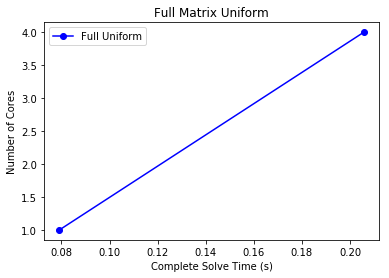

In [16]:
plt.plot(Petsc_AMGX_Full_Unif_CS,Petsc_AMGX_Full_Unif_Cores,'bo-',label="Full Uniform")
#plt.yscale("log")
#plt.xscale("log")
plt.ylabel("Number of Cores")
plt.xlabel("Complete Solve Time (s)")
plt.title("Full Matrix Uniform")
plt.legend()
plt.show

# Schur Uniform Matrix with AMGX

In [17]:
Petsc_AMGX_Schur_Unif_Cores = np.array([1,4])
Petsc_AMGX_Schur_Unif_Iterations = np.array([15,15])
Petsc_AMGX_Schur_Unif_Residual = np.array([5.7287734271363e-14,2.2600255644831e-13])
Petsc_AMGX_Schur_Unif_Error = np.array([1.2433617093859e-03,3.1047600053384e-04])
Petsc_AMGX_Schur_Unif_Domain = np.array([0.0278877456,0.0283390281])
Petsc_AMGX_Schur_Unif_Matrix = np.array([0.0588594731,0.0632796101])
Petsc_AMGX_Schur_Unif_AMGX = np.array([0.0597267248,0.2071640541])
Petsc_AMGX_Schur_Unif_LSS = np.array([0.1185939362,0.2704656285])
Petsc_AMGX_Schur_Unif_LinS = np.array([0.0454767412,0.1184891837])
Petsc_AMGX_Schur_Unif_PS = np.array([0.0029428548,0.0040731875])
Petsc_AMGX_Schur_Unif_CS = np.array([0.048425405,0.1225776319])
Petsc_AMGX_Schur_Unif_DegF = np.array([102400,409600])
Petsc_AMGX_Schur_Unif_Eff = np.array(np.ones(len(Petsc_AMGX_Schur_Unif_Cores))*Petsc_AMGX_Schur_Unif_CS[0]/(Petsc_AMGX_Schur_Unif_CS*Petsc_AMGX_Schur_Unif_Cores))

d = {"Cores": Petsc_AMGX_Schur_Unif_Cores,"Iterations": Petsc_AMGX_Schur_Unif_Iterations,"Residual": Petsc_AMGX_Schur_Unif_Residual,
    "Error": Petsc_AMGX_Schur_Unif_Error,"Domain Initialization": Petsc_AMGX_Schur_Unif_Domain,"Matrix Formation": Petsc_AMGX_Schur_Unif_Matrix,
    "AMGX Setup": Petsc_AMGX_Schur_Unif_AMGX,"Linear System Setup": Petsc_AMGX_Schur_Unif_LSS,"Linear Solve": Petsc_AMGX_Schur_Unif_LinS,
    "Patch Solve": Petsc_AMGX_Schur_Unif_PS,"Complete Solve": Petsc_AMGX_Schur_Unif_CS,"Efficiency": Petsc_AMGX_Schur_Unif_Eff,
    "Degrees of Freedom": Petsc_AMGX_Full_Unif_DegF}
dfsu =  pd.DataFrame(data = d)
dfsu = dfsu[["Cores","Iterations","Residual","Error","Domain Initialization","Matrix Formation","AMGX Setup",
         "Linear System Setup","Linear Solve","Patch Solve","Complete Solve","Efficiency","Degrees of Freedom"]]
dfsu

,Cores,Iterations,Residual,Error,Domain Initialization,Matrix Formation,AMGX Setup,Linear System Setup,Linear Solve,Patch Solve,Complete Solve,Efficiency,Degrees of Freedom
0,1,15,5.728773e-14,0.001243,0.027888,0.058859,0.059727,0.118594,0.045477,0.002943,0.048425,1.000000,102400
1,4,15,2.260026e-13,0.000310,0.028339,0.063280,0.207164,0.270466,0.118489,0.004073,0.122578,0.098765,409600


<function matplotlib.pyplot.show>

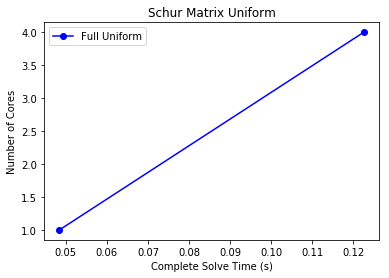

In [18]:
plt.plot(Petsc_AMGX_Schur_Unif_CS,Petsc_AMGX_Schur_Unif_Cores,'bo-',label="Full Uniform")
#plt.yscale("log")
#plt.xscale("log")
plt.ylabel("Number of Cores")
plt.xlabel("Complete Solve Time (s)")
plt.title("Schur Matrix Uniform")
plt.legend()
plt.show